In [ ]:
import h5py
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import os
import cooltools
import cooler
import cooltools.lib.plotting
from cooltools import numutils
from itertools import cycle, islice

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

from scipy import ndimage as nd
from scipy.stats import pearsonr
from scipy.signal import find_peaks
from sklearn.decomposition import PCA
from statsmodels.sandbox.stats.multicomp import multipletests as FDR
from concurrent.futures import ProcessPoolExecutor, as_completed
from scipy.stats import pearsonr
from scipy.signal import find_peaks
from sklearn.decomposition import PCA
from statsmodels.sandbox.stats.multicomp import multipletests as FDR
from concurrent.futures import ProcessPoolExecutor, as_completed

In [3]:
# HiC basics metrices
# import core packages
import warnings
warnings.filterwarnings("ignore")
from itertools import combinations

# import semi-core packages
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
plt.style.use('seaborn-poster')

# import open2c libraries
import bioframe
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [7]:
from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

## Visualize by Hi-C Clusters (Fig.5E)

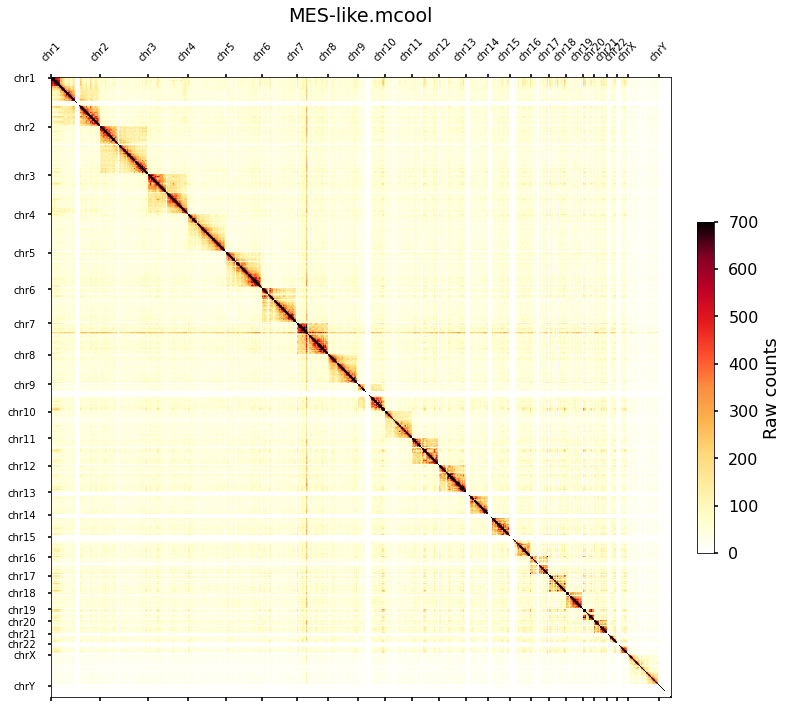

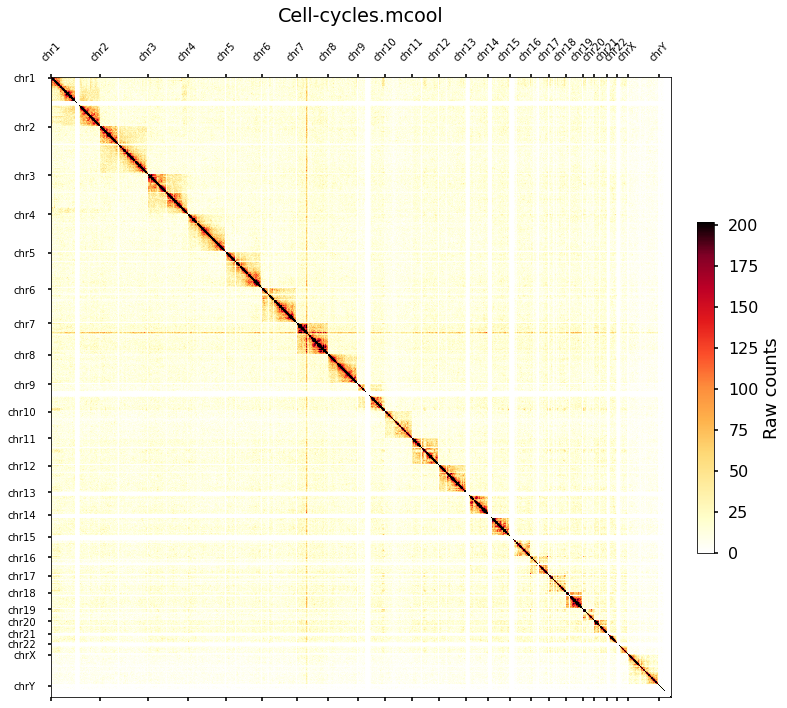

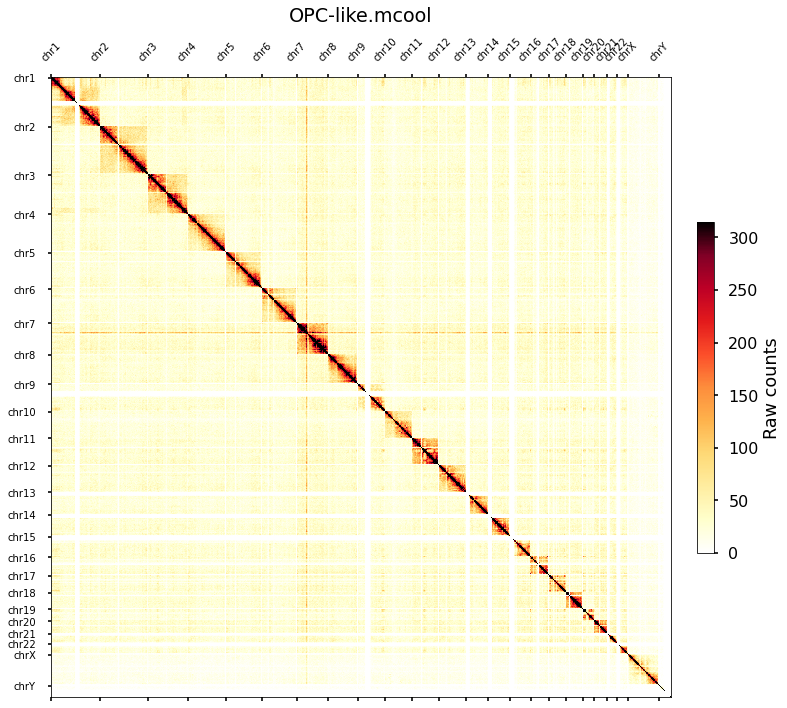

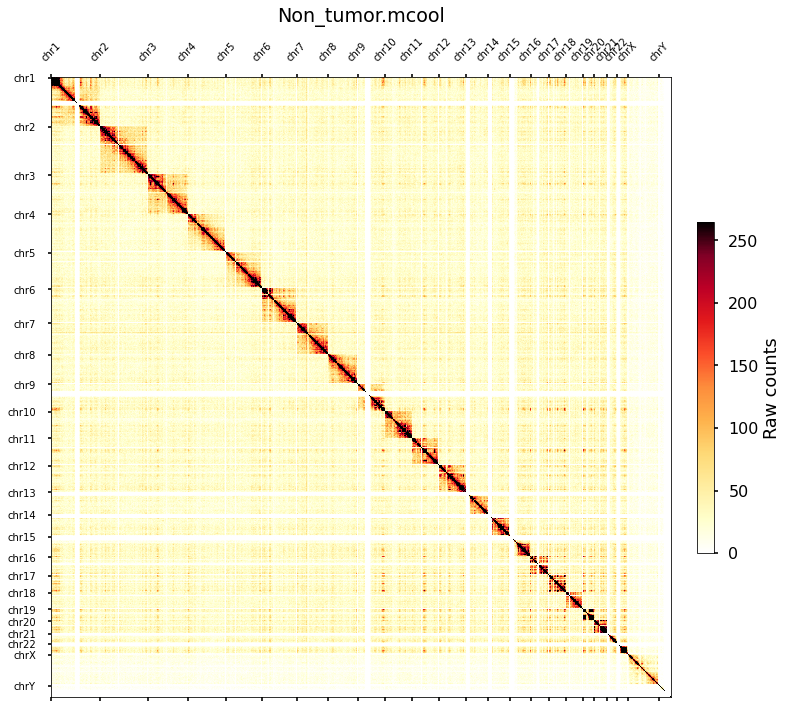

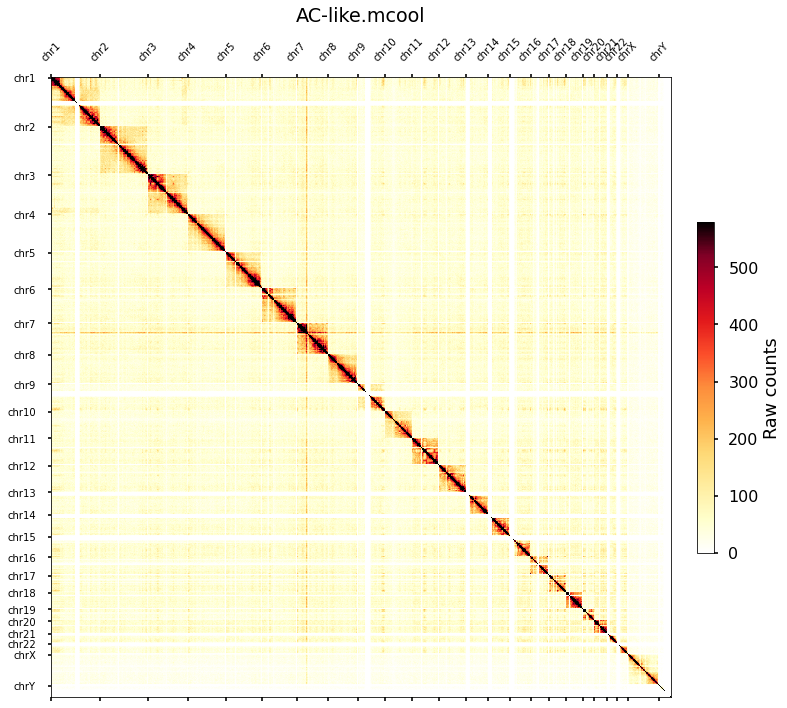

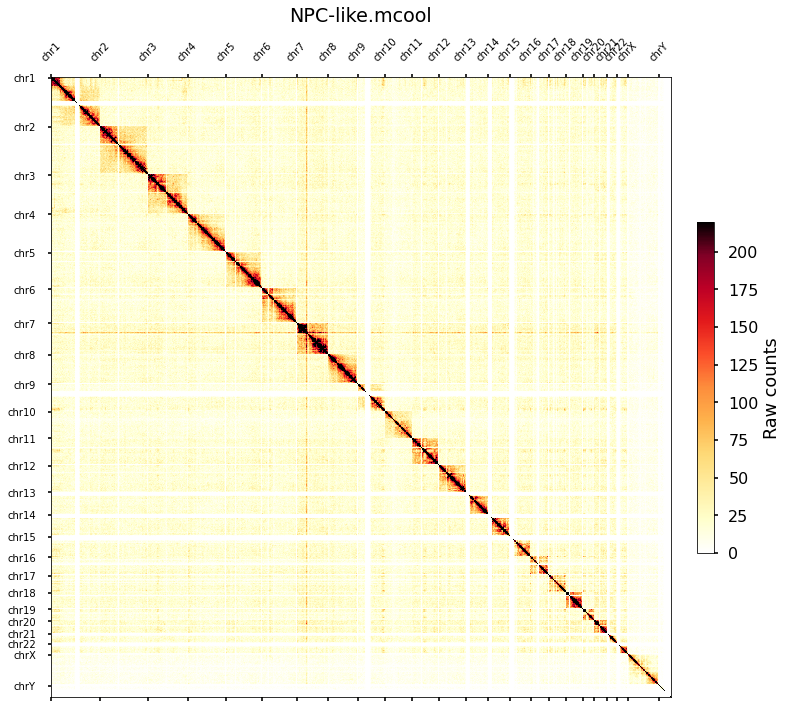

In [9]:
lib = 'LC675'
ipath = "/projects/ps-renlab2/y2xie/projects/77.LC/56.GBM_P4CC3_NovaSeq_230521/04.matrices/" + lib + "_quadrant_states/"
files = [file for file in os.listdir(ipath) if file.endswith('mcool')]
chromp = ('chr7')
for sample in files: 
    clr = cooler.Cooler(ipath + sample + '::resolutions/5000000')
    clr_chromstarts = []
    for i in clr.chromnames:
        clr_chromstarts.append(clr.extent(i)[0])  
    f, ax = plt.subplots(
        figsize=(11,10.5))
    mtx = clr.matrix(balance=False)[:]# .fetch(chromp)
    vmax = round(np.max(mtx) / 1000)
    im = ax.matshow(mtx, cmap='fall', vmax = vmax)# , extent=(0,clr.chromsizes[chromp], clr.chromsizes[chromp], 0))
    plt.colorbar(im, fraction=0.025, pad=0.04, label='Raw counts')
    ax.set_xticks(clr_chromstarts)    
    ax.set_yticks(clr_chromstarts)
    ax.set_xticklabels(clr.chromnames, fontsize=10, rotation=45)
    ax.set_yticklabels(clr.chromnames, fontsize=10)
    # format_ticks
    ax.set_title(sample, y=1.08)
    plt.tight_layout()
    # plt.savefig(lib + "_" + sample + "_231121.pdf", format = "pdf", bbox_inches = 'tight')